In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('colorblind')
sns.set_context('poster')

In [2]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

In [3]:
mal = pd.read_csv('~/Research/malatium/data/atium.csv', index_col=0)
mal.head(5)

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
0,1435467,6326,3.0164,70.369,77,0.034,0.1,6.3,0.01,0.3513,...,0.059509,0.620728,6.541180,0.757775,0.672485,11.669772,0.724637,NaN,0,0.000777
1,2837475,6614,1.6270,75.729,77,0.041,0.1,8.2,0.01,0.1757,...,0.046604,0.154079,3.499114,0.172064,0.555348,22.351415,0.540087,NaN,0,0.000587
2,3427720,6045,2.2339,120.068,77,0.031,0.1,10.7,-0.06,0.2396,...,0.031153,11.821919,31.590512,10.236450,0.305072,1.473754,0.278017,NaN,0,0.000607
3,3456181,6384,2.0901,52.264,77,0.041,0.1,8.3,-0.15,0.1278,...,0.059344,2.790842,10.699926,2.006340,0.734456,8.634898,0.746225,NaN,0,0.000788
4,3632418,6193,2.6331,60.704,77,0.019,0.1,3.0,-0.12,0.1757,...,0.034584,0.729588,11.205550,0.624963,0.222056,8.216637,0.228105,NaN,0,0.000551


In [4]:
ms = mal.hrclass == 'MS'
h = mal.hrclass == 'H'
sg = mal.hrclass == 'SG'

In [5]:
mx = mal.Teff.max()+100
mn = mal.Teff.min()-100
mx -= mn
m = 6250 
m -= mn
mn -= mn

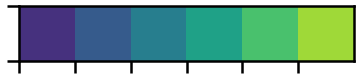

In [6]:
snsmap = sns.color_palette('viridis')
sns.palplot(snsmap)

In [7]:
import glob
tracks = glob.glob('../data/tracks/*.csv')
tracks

['../data/tracks/m1.00_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m1.25_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m0.75_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m1.50_ovh0.02d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv',
 '../data/tracks/m1.50_ovh0.00d_udh0.00d_ovhe0.00s_z0.01493_y0.26588.csv']

In [8]:
m075 = pd.read_csv(tracks[1])
m1 = pd.read_csv(tracks[3])
m125 = pd.read_csv(tracks[2])
m15 = pd.read_csv(tracks[0])
print(m1.columns)

Index(['model_number', 'elapsed_time', 'star_age', 'star_mass', 'effective_T',
       'photosphere_L', 'photosphere_r', 'luminosity', 'radius', 'gravity',
       ...
       'burn_qtop_30', 'burn2_top1', 'burn2_bot1', 'burn2_top2', 'burn2_bot2',
       'burn2_top3', 'burn2_bot3', 'burn2_top4', 'burn2_bot4', 'coupling'],
      dtype='object', length=190)


In [9]:
m075 = m075[abs(m075['surface_h1']-m075['center_h1'])>0.01] 
m1 = m1[abs(m1['surface_h1']-m1['center_h1'])>0.01] 
m125 = m125[abs(m125['surface_h1']-m125['center_h1'])>0.01] 
m15 = m15[abs(m15['surface_h1']-m15['center_h1'])>0.01] 

In [10]:
mnras_size(595, square=True)

[8.26388888888889, 8.26388888888889]

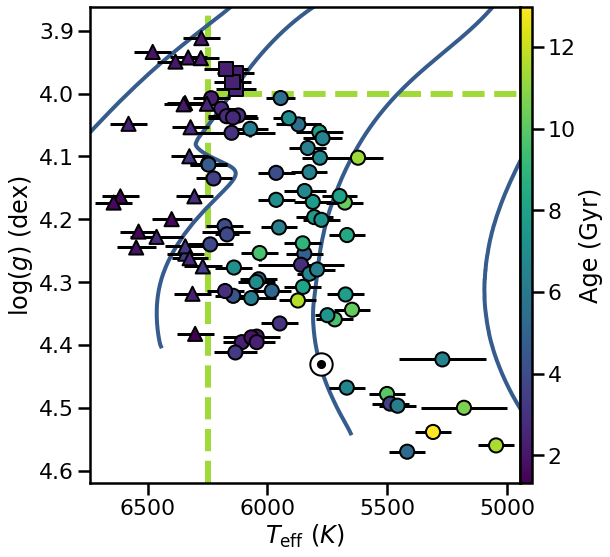

In [11]:
fig, ax = plt.subplots(figsize=(9, 8.263)) 
c = ax.scatter(mal.Teff[ms], mal.modlogg[ms], c=mal.age[ms], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', lw=2, s=200, zorder=3)
c = ax.scatter(mal.Teff[sg], mal.modlogg[sg], c=mal.age[sg], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', lw=2, marker=',', s=200, zorder=3)
c = ax.scatter(mal.Teff[h], mal.modlogg[h], c=mal.age[h], vmin= mal.age.min(), vmax = mal.age.max(),
               ec='k', marker='^', lw=2, s=200, zorder=3)

ax.errorbar(mal.Teff, mal.modlogg, xerr=mal.eTeff, yerr=[mal.lomodlogg, mal.upmodlogg],
            fmt='|', c='k', zorder=2, lw=3)

ax.scatter([5777, np.nan], [4.43, np.nan], c='k', vmin=mal.age.min(), vmax=mal.age.max(), s=50, zorder=3)
ax.scatter([5777, np.nan], [4.43, np.nan], ec='k', fc='w', vmin=mal.age.min(), vmax=mal.age.max(), s=500, zorder=2)

plt.plot(m075.effective_T, np.log10(m075.gravity), c=snsmap[1], ls='-', lw=4, zorder=1)
plt.plot(m1.effective_T, np.log10(m1.gravity), c=snsmap[1], ls='-', lw=4, zorder=1)
plt.plot(m125.effective_T, np.log10(m125.gravity), c=snsmap[1], ls='-', lw=4, zorder=1)
plt.plot(m15.effective_T, np.log10(m15.gravity), c=snsmap[1], ls='-', lw=4, zorder=1)

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(mal.Teff.max()+100, mal.Teff.min()-100)
ax.set_ylim(mal.modlogg.max()+0.05, mal.modlogg.min()-0.05)
fig.colorbar(c,label='Age (Gyr)', pad=0,aspect=40)
ax.axvline(6250, c=snsmap[-1], ls='--', lw=6, zorder=0)
ax.axhline(4.0, c=snsmap[-1], ls='--', lw=6, xmin=1 - m/mx, zorder=0)
ax.set_xlabel(r'$T_{\rm eff}$ ($K$)')
ax.set_ylabel(r'$\log(g)$ (dex)')
fig.tight_layout()
# plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/data.pdf', bbox_inches='tight',rasterized=True)

# Let's plot the spectrum of a fit

In [12]:
import lightkurve as lk
class model():
    def __init__(self, f, n0_, n1_, n2_, deltanu_):
        self.f = f
        self.n0 = n0_
        self.n1 = n1_
        self.n2 = n2_
        self.npts = len(f)
        self.M = [len(n0_), len(n1_), len(n2_)]
        self.deltanu = deltanu_

    def epsilon(self, i, l, m):
        if l == 0:
            return 1
        if l == 1:
            if m == 0:
                return np.cos(i)**2
            if np.abs(m) == 1:
                return 0.5 * np.sin(i)**2
        if l == 2:
            if m == 0:
                return 0.25 * (3 * np.cos(i)**2 - 1)**2
            if np.abs(m) ==1:
                return (3/8)*np.sin(2*i)**2
            if np.abs(m) == 2:
                return (3/8) * np.sin(i)**4
                
    def lor(self, freq, h, w):
        return h / (1.0 + 4.0/w**2*(self.f - freq)**2)

    def mode(self, l, freqs, hs, ws, i, split=0):
        for idx in range(self.M[l]):
            for m in range(-l, l+1, 1):
                self.modes += self.lor(freqs[idx] + (m*split),
                                     hs[idx] * self.epsilon(i, l, abs(m)),
                                     ws[idx])

    def model(self, p, theano=True):
        f0, f1, f2, g0, g1, g2, h0, h1, h2, split, i, phi = p

        # Unpack background parameters
        loga = phi[0]
        logb = phi[1]
        logc = phi[2]
        logd = phi[3]
        logj = phi[4]
        logk = phi[5]
        white = phi[6]
        scale = phi[7]
        nyq = phi[8]

        # Calculate the modes
        self.modes = np.zeros(self.npts)
        self.mode(0, f0, h0, g0, i)
        self.mode(1, f1, h1, g1, i, split)
        self.mode(2, f2, h2, g2, i, split)
        self.modes *= self.get_apodization(nyq)

        #Calculate the background
        self.back = self.get_background(loga, logb, logc, logd, logj, logk,
                                       white, scale, nyq)

        #Create the model
        self.mod = self.modes + self.back
        return self.mod

    def harvey(self, a, b, c):
        harvey = 0.9*a**2/b/(1.0 + (self.f/b)**c)
        return harvey

    def get_apodization(self, nyquist):
        x = (np.pi * self.f) / (2 * nyquist)
        return (np.sin(x)/x)**2

    def get_background(self, loga, logb, logc, logd, logj, logk, white, scale, nyq):
        background = np.zeros(len(self.f))
        background += self.get_apodization(nyq) * scale  \
                        * (self.harvey(10**loga, 10**logb, 4.) \
                        +  self.harvey(10**logc, 10**logd, 4.) \
                        +  self.harvey(10**logj, 10**logk, 2.))\
                        +  white
        return background  


In [13]:
from astropy.io import ascii, fits
from astropy import units as u
kic = 12069424


files = glob.glob('/Users/Oliver/PhD/mnt/RDS/malatium/peakbag/{}/*chains.csv'.format(str(kic)))
chains = pd.read_csv(files[0], index_col=0)
ati = pd.read_csv('../data/atium.csv', index_col=0)
idx = ati[ati.KIC == kic].index[0]

IndexError: list index out of range

In [14]:
bro = pd.read_csv('../data/bronze.csv', index_col=0)
bro = bro[bro.l != 3]
star = bro[bro.KIC == str(kic)]
res = [star.loc[star.l == 0].f.values,
        star.loc[star.l == 1].f.values,
        star.loc[star.l == 2].f.values,
        star.loc[star.l == 0].g.values,
        star.loc[star.l == 1].g.values,
        star.loc[star.l == 2].g.values,
        star.loc[star.l == 0].H.values,
        star.loc[star.l == 1].H.values,
        star.loc[star.l == 2].H.values,
        ati.loc[idx].nus,
        ati.loc[idx].i,
        [np.median(chains[f'phi__{j}']) for j in range(9)]]

NameError: name 'ati' is not defined

In [15]:
# Read in the data
sfile = glob.glob(f'../data/16Cyg/*100002741*PSD*.fits')[0]
data = fits.open(sfile)[0].data
ff, pp = data[:,0]*1e6, data[:,1]

# Select the range
deltanu = ati.loc[idx].dnu
lo = star.f.min() - 10*deltanu
hi = star.f.max() + .25*deltanu

sel = (ff > lo) & (ff < hi)
f = ff[sel]
p = pp[sel]

# Set up the model
n0 = star.loc[star.l == 0].n.values
n1 = star.loc[star.l == 1].n.values
n2 = star.loc[star.l == 2].n.values
mod = model(f, n0, n1, n2, deltanu)  

IndexError: list index out of range

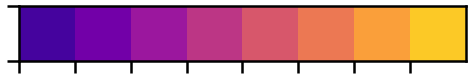

In [16]:
snsmap = sns.color_palette('plasma', 8)
sns.palplot(snsmap)

NameError: name 'mod' is not defined

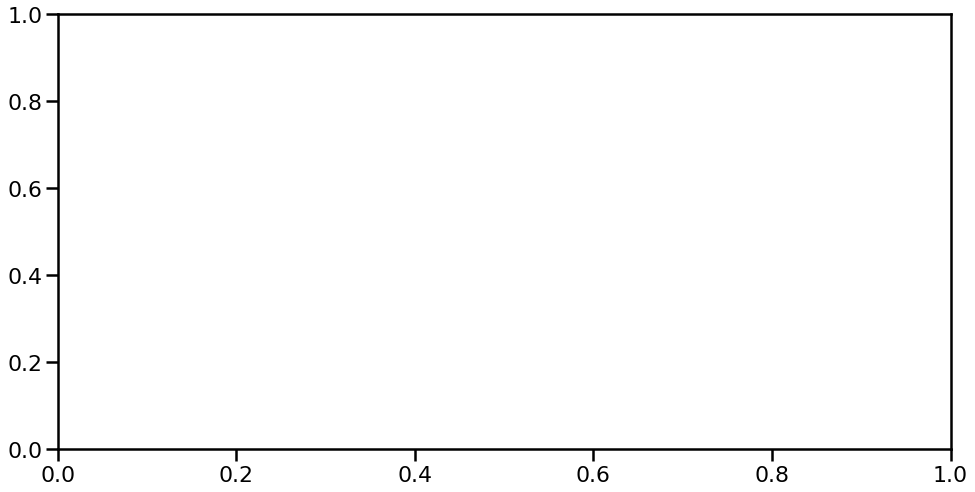

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(mod.f, p, c=snsmap[5], alpha=.8, label='16 Cyg A')
ax.plot(mod.f, mod.model(res, theano=False), c=snsmap[0], label='Model')
ax.set_ylabel(r'Power Spectral Density [$\frac{\rm{ppm}^2}{\mu\rm{Hz}}$]')
ax.set_xlabel(r'Frequency [$\mu\rm{Hz}$]')
ax.legend(loc='upper right')

shift = 2*deltanu
axin = ax.inset_axes([700, 30, 900, 40], transform=ax.transData)
x1, x2, y1, y2 = 2100-shift, 2116-shift, 0, 12
axin.set_xlim(x1, x2)
axin.set_ylim(y1, y2)
axin.set_yticks([])
axin.set_xticks([])
# axin.set_yticklabels('')
ax.indicate_inset_zoom(axin, edgecolor='k', alpha=.7)
axin.plot(mod.f, p, c=snsmap[5], alpha=.8, label='16 Cyg A', lw=1)
axin.plot(mod.f, mod.model(res, theano=False), c=snsmap[0], label='Model')
ax.set_ylim(0)
ax.set_xlim(mod.f.min(), mod.f.max())
sns.despine()
fig.tight_layout()
plt.savefig('/Users/Oliver/Dropbox/Apps/Overleaf/Malatium/Images/modelfit.pdf', bbox_inches='tight', rasterized=True)

## Fullsample plot

In [18]:
standard = pd.read_hdf('../data/jvs_models/standard_population.h5', key='sample', mode='r')
standard.rename(columns={'period':'P',
                         'age':'Age','mass':'M'}, inplace=True)
standard.head(1)

,M,Teff,logg,Age,log(L/Lsun),kepmag,P,[Fe/H],sdss_g,sdss_r,sdss_i,sdss_z,2mass_j,2mass_h,2mass_k,distmod,av
0,0.90424,5674.121798,4.54636,2.34408,-0.183266,13.179899,16.514088,-0.25,13.608602,13.11637,12.989363,12.9559,12.057497,11.71793,11.673961,8.0,0.023


In [19]:
rocrit = pd.read_hdf('../data/jvs_models/rocrit_population.h5', key='sample', mode='r')
rocrit.rename(columns={'period':'P',
                         'age':'Age','mass':'M'}, inplace=True)
rocrit.head(1)

,M,Teff,logg,Age,log(L/Lsun),kepmag,P,[Fe/H],sdss_g,sdss_r,sdss_i,sdss_z,2mass_j,2mass_h,2mass_k,distmod,av
0,1.61144,5058.112357,3.440028,1.877246,0.974361,11.350579,45.489845,-0.11,11.991957,11.279396,11.073495,10.975381,9.958406,9.495029,9.427129,9.0,0.028


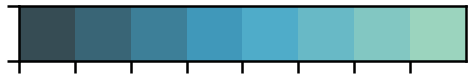

In [20]:
from matplotlib.colors import ListedColormap
snsmap = sns.color_palette('GnBu_d',8)
cmap = ListedColormap(snsmap.as_hex())
sns.palplot(snsmap)

In [21]:
import pandas as pd
ati = pd.read_csv('../data/atium.csv', index_col=0)
f_ati = pd.read_csv('../data/atium.csv', index_col=0)
ati = ati[ati.eye_flag != 3]

ati.drop(ati[ati.KIC == 6603624].index, inplace=True)
ati.drop(ati[ati.KIC == 8760414].index, inplace=True)
ati.drop(ati[ati.KIC == 8938364].index, inplace=True)
print(f'Working with {len(ati)} stars')

Working with 91 stars


In [22]:
c2 = ati.copy(deep=True)
sel = (c2.neff_split > 1000) & (c2.rhat_flag != 'rhat_1')
sg = c2[sel]['hrclass'] == 'SG'
ms = c2[sel]['hrclass'] == 'MS'
h = c2[sel]['hrclass'] == 'H'
print(f'Number of stars: {len(c2[sel])}/{len(ati)}')
print(f'We have {len(c2[sel][sg])} Sub-Giant stars.')
print(f'We have {len(c2[sel][h])} Hot stars.')
print(f'We have {len(c2[sel][ms])} Main-Sequence stars.')

Number of stars: 73/91
We have 4 Sub-Giant stars.
We have 22 Hot stars.
We have 47 Main-Sequence stars.


In [23]:
import numpy as np
fsel = f_ati['KIC'].isin(c2[sel]['KIC'])
fin = f_ati[fsel]

exc = f_ati.loc[~f_ati['KIC'].isin(fin.KIC)]
feh = fin.loc[np.abs(fin.feh.values) > 0.4]
excfeh = exc.loc[np.abs(exc.feh.values) > 0.4]

In [24]:
ms = (fin.hrclass == 'MS').values
h = (fin.hrclass == 'H').values
sg = (fin.hrclass == 'SG').values

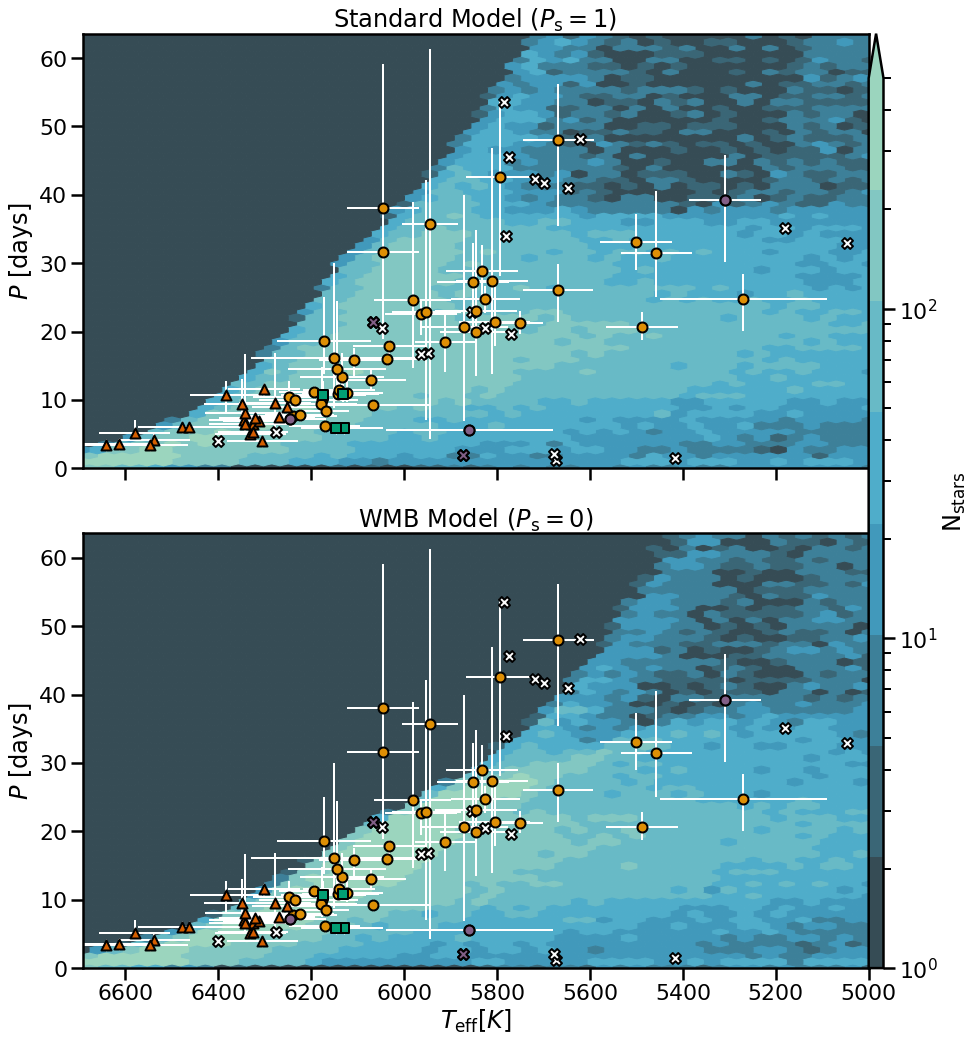

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(15,15), sharex=True)
ax = axes[0]
c = ax.hexbin(standard.Teff, standard.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

# Excluded
ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
# FeH
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')
ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
# ax.set_xlabel(r'$T_{\rm eff} (K)$')
ax.set_title(r'Standard Model ($P_{\rm s} = 1$) ')
# ax.legend(loc='upper left')

ax = axes[1]
c = ax.hexbin(rocrit.Teff, rocrit.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')

ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
ax.set_title(r'WMB Model ($P_{\rm s} = 0$)')
# ax.legend(loc='upper left')

fig.tight_layout()
fig.colorbar(c, ax=axes.ravel(),label=r'$\rm{N_{\rm stars}}$', pad=0, aspect=60, extend='max')
# plt.savefig('natastron/Images/fullsample.png', bbox_inches='tight', dpi=300)
# plt.savefig('natastron/Images/fullsample.pdf', bbox_inches='tight', rasterized=True)

## And for nature...

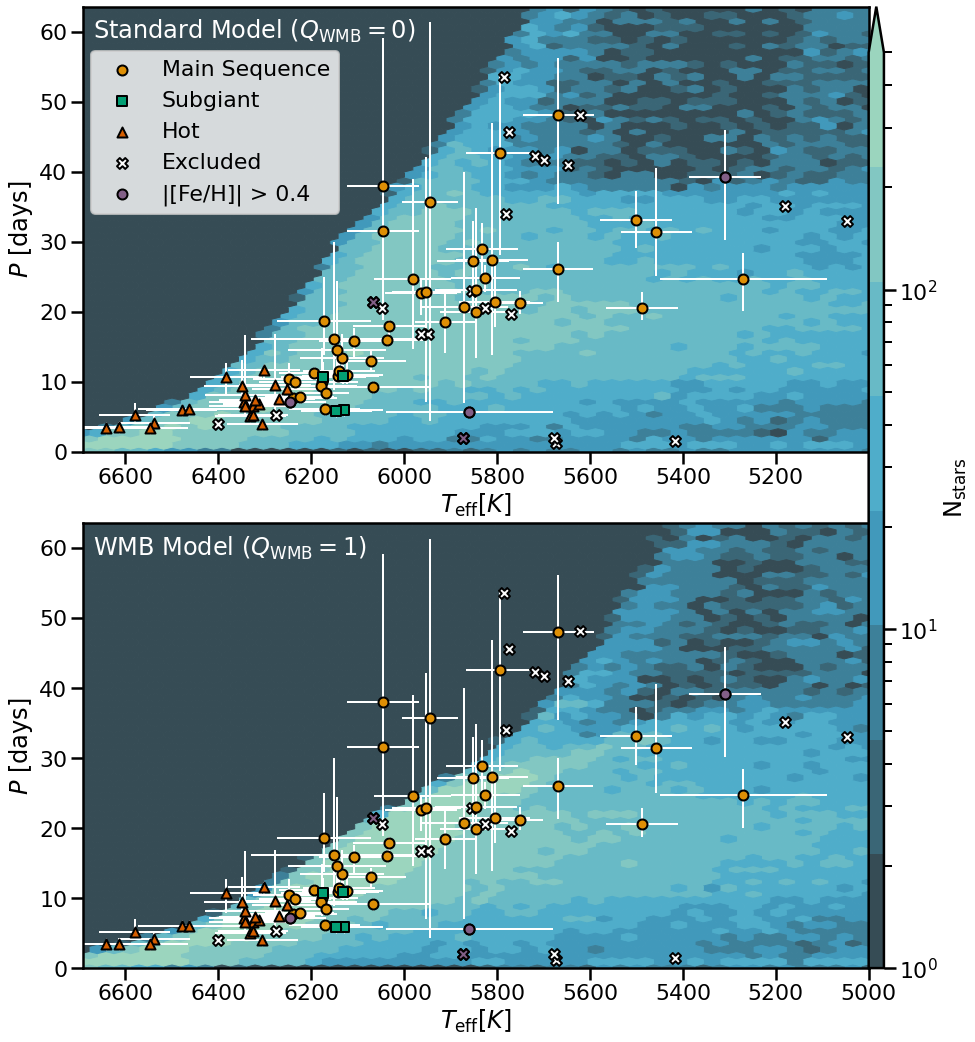

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(15,15))
ax = axes[0]
c = ax.hexbin(standard.Teff, standard.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

# Excluded
ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
# FeH
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')
ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
title = r'Standard Model ($Q_{\rm WMB} = 0$) '
ax.text(6670, 59, title, c='w')
ax.legend(bbox_to_anchor=[.34,.51,0,0])
ax.xaxis.set_ticklabels([None, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600])
# ax.xaxis.tick_top()


ax = axes[1]
c = ax.hexbin(rocrit.Teff, rocrit.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')

ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
title = r'WMB Model ($Q_{\rm WMB} = 1$)'
ax.text(6670, 59, title, c='w')

fig.tight_layout()
plt.subplots_adjust(hspace=0.16)

fig.colorbar(c, ax=axes.ravel(),label=r'$\rm{N_{\rm stars}}$', pad=0, aspect=60, extend='max')
plt.savefig('natastron/Publication/Images/fullsample.png', bbox_inches='tight', dpi=300)
plt.savefig('natastron/Publication/Images/fullsample.pdf', bbox_inches='tight', rasterized=True)

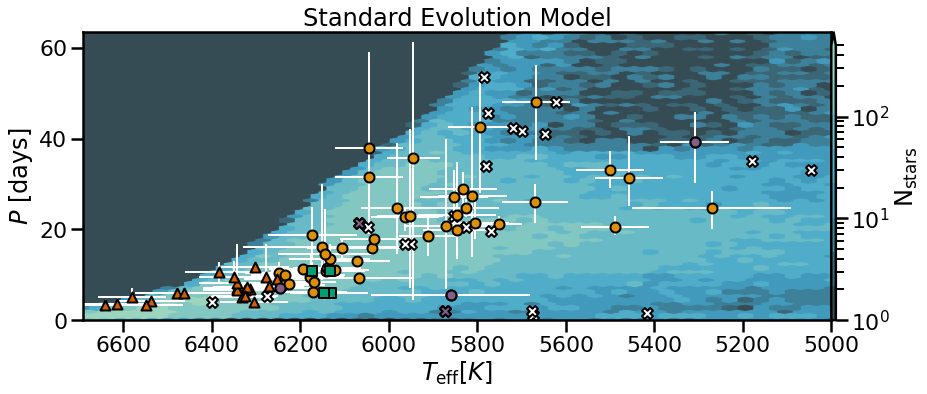

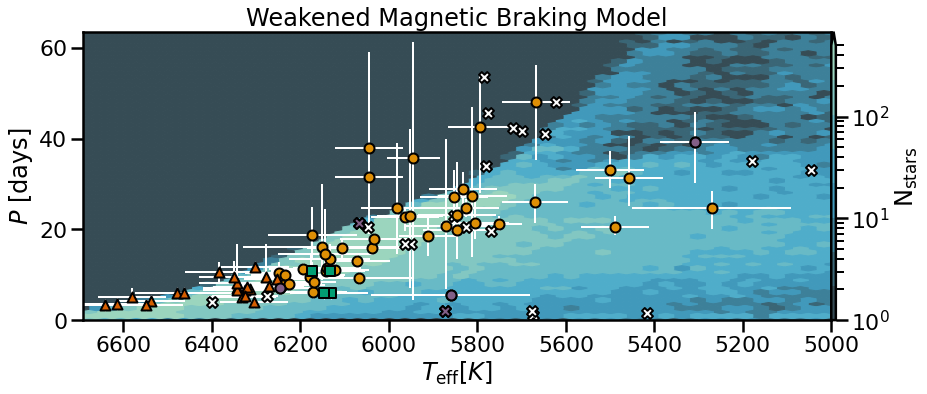

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,6))
c = ax.hexbin(standard.Teff, standard.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

# Excluded
ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
# FeH
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')
ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
fig.colorbar(c, ax=ax,label=r'$\rm{N_{\rm stars}}$', pad=0, aspect=60, extend='max')
ax.set_title("Standard Evolution Model")
fig.tight_layout()


plt.savefig('../poster/fullsample0.png', bbox_inches='tight', dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(14,6))
c = ax.hexbin(rocrit.Teff, rocrit.P, cmap=cmap, bins='log', vmin=1, vmax=500)
ax.invert_xaxis()
ax.scatter(np.nan, np.nan)
ax.scatter(fin.Teff[ms], fin.P[ms], marker='o', s=100,zorder=3, ec='k', lw='2', label='Main Sequence')
ax.scatter(fin.Teff[sg], fin.P[sg], marker=',', s=100,zorder=3, ec='k', lw='2', label='Subgiant')
ax.scatter(fin.Teff[h], fin.P[h], marker='^', s=100,zorder=3, ec='k', lw='2', label='Hot')

ax.scatter(exc.Teff, exc.P, marker='X', s=120,zorder=2, ec='k', c='w', lw=2, label='Excluded')
ax.scatter(excfeh.Teff, excfeh.P, marker='X', s=120,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2)
ax.scatter(feh.Teff, feh.P, marker='o', s=100,zorder=5, ec='k', 
           c=sns.xkcd_rgb["dusty purple"], lw=2, label='|[Fe/H]| > 0.4')

ax.errorbar(fin.Teff, fin.P, c='w', lw=2, xerr=fin.eTeff, yerr=[fin.l_P, fin.u_P], fmt='|', zorder=1)
ax.set_ylim(0, ati.P.max() + 10)
ax.set_xlim(ati.Teff.max()+50, 5000)
ax.set_ylabel(r'$P$ [days]')
ax.set_xlabel(r'$T_{\rm eff} [K]$')
ax.set_title("Weakened Magnetic Braking Model")


fig.colorbar(c, ax=ax,label=r'$\rm{N_{\rm stars}}$', pad=0, aspect=60, extend='max')
fig.tight_layout()

plt.savefig('../poster/fullsample1.png', bbox_inches='tight', dpi=300)